# Coined Model 

In [1]:
import math
import numpy as np
import scipy as sp
import sympy as sy
import networkx as nx
from numpy import linalg as LA
from random import random,randint
import cmath
from neblina import *
import scipy.special
import time
import sys
#interactive matplotlib
#%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import cm as cmap

from CoinedModel import *

In [2]:
float_ = 2 #TODO import constants (to avoid surprises case they're changed)
complex_ = 13 #TODO import constants (to avoid surprises case they're changed)
init_engine(0)

In [3]:
num_vert = 121
G = nx.grid_graph(dim=(num_vert, num_vert), periodic=True)
# nx.draw(G)

In [4]:
adj_mtrx = nx.linalg.graphmatrix.adjacency_matrix(G) # Sparse matrix
#n = A.shape[0]
adj_mtrx = adj_mtrx.todense()
adj_mtrx

matrix([[0, 1, 0, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 0, 1, 0]])

In [5]:
#S = ShiftOperator(adj_mtrx)
#S.todense()

###############################################3

#S2 = np.zeros((num_vert**2 * 4, num_vert**2 * 4))
S = sp.sparse.csr_matrix((num_vert**2 * 4, num_vert**2 * 4))

for v in range(num_vert**2):
    for d in range(4):
        v2 = v
        if int(d / 2) == 0:
            v2 = int(v/num_vert)*num_vert + (v+1)%num_vert
        else:
            v2 = int(v/num_vert)*num_vert + (v-1)%num_vert
        
        if d % 2 == 0:
            v2 = (v2 + num_vert) % (num_vert**2)
        else:
            v2 = (v2 - num_vert) % (num_vert**2)
            
        #S2[(v2*4+d)%(num_vert**2*4), (v*4 + d)%(num_vert**2*4)] = 1
        S[(v2*4+d)%(num_vert**2*4), (v*4 + d)%(num_vert**2*4)] = 1

/home/koruja/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [6]:
# S2 = S.todense()
# for i in range(8):
#     print(S2[i,0:8])

In [7]:
C = CoinOperator(adj_mtrx)
# C2 = C.todense()
# for i in range(8):
#     print(C2[i,0:8])

In [8]:
mid_vert = int(np.ceil(num_vert**2 / 2)) - 1
#mid_vert = int(np.ceil(num_vert**2 / 4)) - 1

#beware that the coin is 4-sided,
#thus, the initial condition being in the middle vertex,
psi0 = np.zeros(4*num_vert**2, dtype=complex)
psi0[4*mid_vert] = 1 #pointing downward
psi0[4*mid_vert + 1] = -1 #poiting leftward
# psi0[4*mid_vert + 2] = 1 #pointing rightward
# psi0[4*mid_vert + 3] = -1 #pointing upward
psi0[4*mid_vert + 2] = -1 #pointing rightward
psi0[4*mid_vert + 3] = 1 #pointing upward
psi0 = psi0 / 2
psi0

array([0.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j])

In [9]:
# [int(i/4) for i in range(len(psi0)) if psi0[i] != 0]

In [10]:
# S2 = S.todense()
# psi1 = np.squeeze(np.array(S2 @ psi0))
# psi1
# [int(i/4) for i in range(len(psi1)) if psi1[i] != 0]

In [11]:
#U = EvolutionOperator_CoinedModel(adj_mtrx, C)
U = S @ C
# U.todense()

In [12]:
def vec_f_(V):
#    printpsi0("test_vector_sparse_matrix_multiplication_complex")
    n = V.shape[0]
    vec_f = vector_new(n, complex_)
    for i in range(n):
        #TODO: check type
        #below doesnt work because imaginary part = 0
        #vector_set(vec_f, i, V[i], 0) 
        vector_set(vec_f, i, V[i].real, V[i].imag)
    return vec_f
        
def smat_f_(M):
#    print("test_vector_sparse_matrix_multiplication_complex")
    n = M.shape[0]

    smat_f = sparse_matrix_new(n, n, complex_)
    
#     for i in range(0,n):
#         for j in range(0,n):
#             if M[i,j] != 0.:
#                 #TODO: check type
#                 #below doesnt work because imaginary part = 0
#                 sparse_matrix_set(smat_f, i, j, M[i,j], 0)
    
    row = 0
    next_row_ind = M.indptr[1]
    j = 2
    for i in range(len(M.data)):
        while i == next_row_ind:
            row += 1
            next_row_ind = M.indptr[j]
            j += 1
            
        col = M.indices[i]
        sparse_matrix_set(smat_f, row, col, M[row, col].real, M[row, col].imag)

#    sparse_matrix_pack(smat_f)
    return smat_f

start = time.time()
vec_psi0 = vec_f_(psi0)
print("vec_f_: " + str(time.time() - start) + "s")
#smat_S = smat_f_(S)
#smat_C = smat_f_(C)
start = time.time()
smat_Uprime = smat_f_(U)
print("smat_f_: " + str(time.time() - start) + "s")

vec_f_: 0.045386552810668945s
smat_f_: 8.510169267654419s


In [13]:
smat_Uprime

<capsule object "py_sparse_matrix_new" at 0x7f37ee5459c0>

In [14]:
def test_vector_sparse_matrix_multiplication_complex_S_C(vec_f,smat_f,smat_f2,N):
#    print("test_vector_sparse_matrix_multiplication_complex")
    print(1)
    
    sparse_matrix_pack(smat_f)
    sparse_matrix_pack(smat_f2)
    
    move_vector_device(vec_f)
    move_sparse_matrix_device(smat_f)
    move_sparse_matrix_device(smat_f2)

    res = sparse_matvec_mul(vec_f, smat_f)
    res = sparse_matvec_mul(res, smat_f2)
    
    for i in range(N-1):
        res = sparse_matvec_mul(res, smat_f)
        res = sparse_matvec_mul(res, smat_f2)
    
    print(5)

    out = move_vector_host(res)
    MV = np.matrix([vector_get(out, 2 * i) + vector_get(out, 2 * i + 1)*complex(0,1) for i in range(n) ]).T
    
    
    return MV

In [15]:
def test_vector_sparse_matrix_multiplication_complex_U(vec_f,smat_f,dim_U,N):
#    print("test_vector_sparse_matrix_multiplication_complex")
    #print(1)
    
    sparse_matrix_pack(smat_f)
    
    move_vector_device(vec_f)
    move_sparse_matrix_device(smat_f)

    res = sparse_matvec_mul(vec_f, smat_f)
    
    for i in range(N-1):
        res = sparse_matvec_mul(res, smat_f)
    
    #print(2)

    out = move_vector_host(res)
    MV = np.matrix([vector_get(out,2*i)+vector_get(out,2*i+1)*complex(0,1) for i in range(n)]).T
        
    return MV

In [16]:
#function to compute probability
#TODO: add a generalized version to CoinedModel
def ComputeProb(state): #não usar compute e usar palavras por extenso
    return [np.sum([float(np.absolute(state[4*i + j])**2) for j in range(4)])
            for i in range(num_vert**2)]

In [17]:
#number of iterations
#for Felix's paper I thought about dividing into three images:
# 1 - probability of initial state
# 2 - probability of "halfway through", e.g. 50 steps
# 3 - final probability, e.g. 100 steps
#N = int(np.floor(num_vert/4))
N = int((num_vert - 1)/4)

n = U.shape[0]
start = time.time()
halfway_res = test_vector_sparse_matrix_multiplication_complex_U(vec_psi0, smat_Uprime, n, N)
vec_halfway = vec_f_(halfway_res)
final_res = test_vector_sparse_matrix_multiplication_complex_U(vec_halfway, smat_Uprime, n, N)
print(time.time() - start)

0.34452009201049805


In [18]:
#function for plotting probability distribution
def PlotProb(state, title=None):
    prob = ComputeProb(state)
    
#     fig = plt.figure(figsize=(18,10))
#     ax = fig.add_subplot(111, projection='3d')


    X = np.arange(0, num_vert, 1)
    Y = np.arange(0, num_vert, 1)
    X, Y = np.meshgrid(X, Y)
    Z = np.reshape(prob, (num_vert, num_vert))
    
#     mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
#     mappable.set_array(Z)
#     mappable.set_clim(0, Z.max()) # optional

#     #ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, lw=2)
    
#     surf = ax.plot_surface(X, Y, Z, cmap=mappable.cmap, linewidth=0, antialiased=False, alpha=0.5,
#                           rstride=1, cstride=1, vmin=0, vmax=Z.max())
    
#     #ax.scatter(X, Y, Z)
    
#     #ax.set_zlim(0, Z.max())
    
#     ax.tick_params(length=10, width=1, labelsize=16, pad=10)
#     ax.set_xlabel('Vertex X ID', labelpad=15, fontsize=18)
#     ax.set_ylabel('Vertex Y ID', labelpad=15, fontsize=18)
#     ax.set_zlabel('Probability', labelpad=30, fontsize=18)
#     if title is not None:
#         ax.set_title(title, fontsize=22)
        
#     fig.colorbar(surf, ticks=np.linspace(0, Z.max(), num=5, endpoint=True),
#                  shrink=0.5, aspect=10, ax=ax, pad=0.1)

#     plt.show()
    
    mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
    mappable.set_array(Z)
    mappable.set_clim(0, Z.max()) # optional

    fig = plt.figure(figsize=(18,10))

    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=mappable.cmap, linewidth=0, antialiased=False,
                    cstride=1, rstride=1, alpha=0.5)
    
    ax.tick_params(length=10, width=1, labelsize=16, pad=10)
    ax.set_xlabel('Vertex X ID', labelpad=15, fontsize=18)
    ax.set_ylabel('Vertex Y ID', labelpad=15, fontsize=18)
    ax.set_zlabel('Probability', labelpad=30, fontsize=18)
    if title is not None:
        ax.set_title(title, fontsize=22)    

    cbar = plt.colorbar(mappable, shrink=0.4, aspect=20, pad=0.15)
    cbar.ax.tick_params(length=10, width=1, labelsize=16)
    plt.tight_layout()
    
    return Z

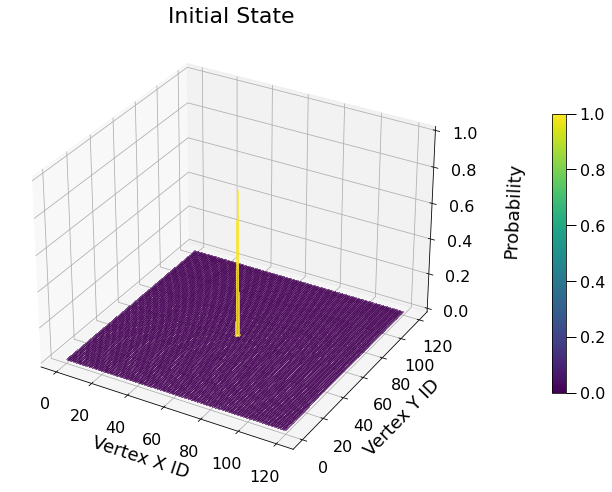

In [19]:
Z1 = PlotProb(psi0.reshape(len(psi0), 1), "Initial State")

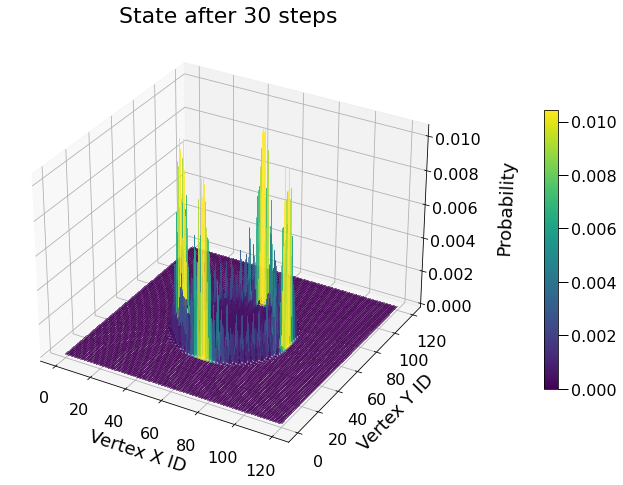

In [20]:
Z = PlotProb(halfway_res, "State after " + str(N) + " steps")

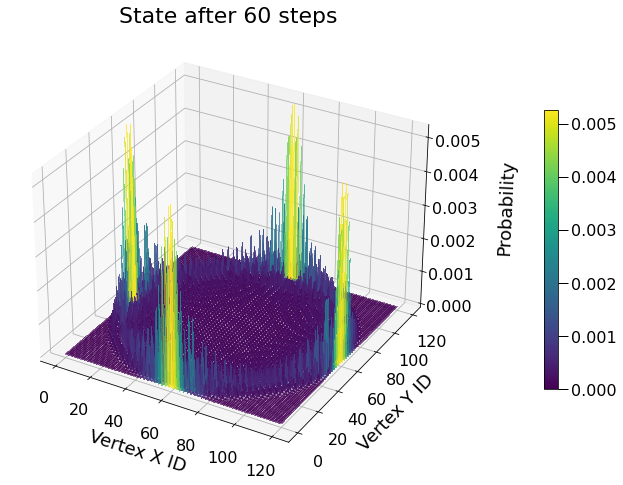

In [21]:
Z2 = PlotProb(final_res, "State after " + str(N*2) + " steps")

In [ ]:
# # z = np.squeeze(np.reshape(Z, (Z.shape[0]**2, 1)))
# # z
# # [(int(i / 25), i % 25) for i in range(len(z)) if z[i] == 0.140625]

# #checking simmetric
# center = int(num_vert / 2)
# center
# for i in range(center):
#     for j in range(center):
#         x_dist = center - i
#         y_dist = center - j
#         if Z[i,j] != Z[center + x_dist, j]:
#             print("assymetric: " + str((i, j)))
#             break

In [ ]:
def print_vertices(state):
    hres = np.reshape(state, (int(state.shape[0]/4), 4))

    for i in range(len(hres)):
        #mid = 12*25+12
        if (hres[i] != np.zeros((1, 4))).any():
            print(str((int(i/25), i%25)) + ": " + str(hres[i]))
        
# print_vertices(halfway_res)

In [ ]:
# print_vertices(U.todense() @ halfway_res)
#print_vertices(psi0)

In [ ]:
# prob = ComputeProb(final_res)
# [ (i, prob[i]) for i in range(len(prob)) if prob[i] != 0]

In [ ]:
# n = Uprime.shape[0]
# serial_Result = np.zeros((n,n))
# start = time.time()
# serial_Result = (Uprime**N)*psi0
# print(time.time() - start)

In [ ]:
# print(LA.norm(serial_Result - parallel_Result))

In [ ]:
# Uprime.shape

In [ ]:
stop_engine()

In [ ]:
# Using Hv (x) Hc
G = 1/2 * np.ones(4) - np.eye(4)
C2 = np.matrix(np.kron(np.eye(num_vert**2), G))
#(C2 == C.todense()).all() #True

#constructing shift operator
S2 = np.zeros((num_vert**2 * 4, num_vert**2 * 4))

for v in range(num_vert**2):
    for d in range(4):
        v2 = v
        if int(d / 2) == 0:
            v2 = int(v/num_vert)*num_vert + (v+1)%num_vert
        else:
            v2 = int(v/num_vert)*num_vert + (v-1)%num_vert
        
        if d % 2 == 0:
            v2 = (v2 + num_vert) % (num_vert**2)
        else:
            v2 = (v2 - num_vert) % (num_vert**2)
            
        #S2[(v2*4+d)%(num_vert**2*4), (v*4 + d)%(num_vert**2*4)] = 1
        S2[(v2*4+d)%(num_vert**2*4), (v*4 + d)%(num_vert**2*4)] = 1
        
S2

#constructing flip-flop shift operator

In [ ]:
# (S2[:,1] == np.zeros(S2.shape[0])).all()
# psi_init = np.zeros(4*num_vert**2)
# psi_init[3] = 1
# [(int(int(i/4)/num_vert), int(int(i/4)%num_vert), i%4) for i in range(len(psi_init)) if (S2 @ psi_init)[i] != 0]
U2 = S2 @ C2
print(U2[0])

In [ ]:
psi02 = np.zeros(num_vert**2 * 4)
psi02[4*mid_vert] = 1
psi02[4*mid_vert + 1] = -1
psi02[4*mid_vert + 2] = -1
psi02[4*mid_vert + 3] = 1
psi02 /= 2
psi02 = psi02.reshape((psi02.shape[0], 1))
PlotProb(psi02)

In [ ]:
PlotProb(U2 @ psi02)

In [ ]:
PlotProb(U2 @U2 @ psi02)

In [ ]:
PlotProb(U2 @ U2 @ U2 @ psi02)

In [ ]:
PlotProb(U2**int((num_vert)/2) @ psi02)

In [ ]:
(U == U2).all()

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, num_vert, 1)
Y = np.arange(0, num_vert, 1)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
#Z = np.sin(R)
Z = Z2

mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array(Z)
mappable.set_clim(Z.min(), Z.max()) # optional

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=mappable.cmap, norm=mappable.norm,
                       linewidth=0, antialiased=True,
                      rstride=1, cstride=1)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)
plt.colorbar(mappable)

plt.show()

In [ ]:
X, Y = np.meshgrid(
    np.linspace(0, num_vert, num_vert),
    np.linspace(0, num_vert, num_vert),
)
Z = Z1

mappable = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
mappable.set_array(Z)
mappable.set_clim(0, Z.max()) # optional

fig = plt.figure(figsize=(10,4))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap=mappable.cmap, linewidth=0, antialiased=False,
                cstride=1, rstride=1)

# ax2 = fig.add_subplot(122)
# ax2.imshow(Z, cmap=mappable.cmap, norm=mappable.norm, extent=(
#     np.min(X), np.max(X), np.min(Y), np.max(Y)), interpolation='none')

print(mappable.norm)

plt.colorbar(mappable)
plt.tight_layout()

In [ ]:
type(Z[0,0])

In [ ]:
type(Z1[0,0])